In [7]:
import pandas as pd
import numpy as np
from statsmodels.api import families
from statsmodels.formula.api import ols, glm
import matplotlib.pyplot as plt
df = pd.read_parquet("../data/curated/result_df.parquet")
df

,earning_efficiency,trip_distance,PULocationID,time_of_day,day_of_week,snow_fall
0,1.187069,3.80,142,0,6,0.0
1,1.488095,2.10,236,0,6,0.0
2,1.088435,0.97,166,0,6,0.0
3,1.052527,1.09,114,0,6,0.0
4,1.606170,5.07,233,0,6,0.0
...,...,...,...,...,...,...
7235809,1.555603,0.80,230,23,4,0.0
7235810,1.174775,4.60,113,23,4,0.0
7235811,1.028918,1.90,238,23,4,0.0
7235812,1.137805,3.96,148,23,4,0.0


(array([7.025767e+06, 2.026410e+05, 7.030000e+03, 2.600000e+02,
        5.500000e+01, 3.000000e+01, 1.600000e+01, 7.000000e+00,
        5.000000e+00, 3.000000e+00]),
 array([ 0.02631959,  2.56968763,  5.11305567,  7.65642371, 10.19979175,
        12.74315979, 15.28652784, 17.82989588, 20.37326392, 22.91663196,
        25.46      ]),
 <BarContainer object of 10 artists>)

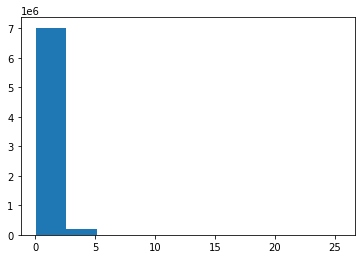

In [8]:
plt.hist(df['earning_efficiency'])

In [9]:
sample_df = df.sample(100000,random_state= 123)

In [10]:
mod = glm(formula = 'earning_efficiency ~ trip_distance + C(PULocationID) + C(time_of_day) + C(day_of_week) + snow_fall'
    , data=sample_df, family=families.Gaussian(families.links.log())).fit()

In [11]:
print(mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     earning_efficiency   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99807
Model Family:                Gaussian   Df Model:                          192
Link Function:                    log   Scale:                         0.18895
Method:                          IRLS   Log-Likelihood:                -58484.
Date:                Sat, 20 Aug 2022   Deviance:                       18859.
Time:                        01:31:19   Pearson chi2:                 1.89e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3026
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0